In [148]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Data Loading

In [149]:
dataset = pd.read_csv("homeprices_banglore.csv")
dataset.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


# Data Preprocessing

### Scaling

In [150]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
sx.fit(dataset[['area','bedrooms']])
sy.fit(dataset['price'].values.reshape(-1,1))

def split_train_test(dataset,TRAIN_RATIO):
    xy_train = dataset[:int(TRAIN_RATIO*dataset.shape[0])]
    xy_test = dataset[int(TRAIN_RATIO*dataset.shape[0]):]
    '''fit_transform does two things:
    --> fit: Learn from the data (like computing the mean, standard deviation, min, max, etc.).
    --> transform: Apply the scaling to the data.'''

    x_train = sx.transform(xy_train.drop('price',axis="columns"))
    
    '''taking values of 'prices' column, reshaping into 2D nparray as sy takes 2D input shape'''
    y_train = sy.transform(xy_train['price'].values.reshape(-1,1)) # -1 means all rows

    x_test = xy_test.drop('price',axis="columns").values
    y_test = xy_test['price'].values.reshape(-1,1)
    
    return x_train,y_train,x_test,y_test


In [151]:
x_train,y_train,x_test,y_test=split_train_test(dataset=dataset,TRAIN_RATIO=0.8)

In [152]:
x_train[2]

array([0.22068966, 0.5       ])

In [153]:
def forward_pass(x, weights, bias):
    y_pred = np.dot(weights,x.T)+bias
    y_pred = y_pred.reshape(-1,1)
    return y_pred

def MeanSquareError(y_true, y_pred):
    return np.mean(np.square(y_true-y_pred))
    
def derivative(x, y_true, y_pred):
    total_samples=x.shape[0]
    dw = -(2/total_samples)*(x.T.dot(y_true - y_pred))
    db = -(2/total_samples)*np.sum(y_true-y_pred)
    return dw , db

def adjustWeight(weights, bias, dw, db, learning_rate):
    weights = weights - learning_rate*dw[:,0]
    bias = bias - learning_rate*db
    return weights, bias

def predict(x,weights,bias):
    scaled_X = sx.fit_transform(x)
    pred = forward_pass(scaled_X,weights,bias)
    pred = sy.inverse_transform(pred)
    return pred
    
def selectData(x,y_true):
    import random
    index=random.randint(0,x.shape[0]-1)
    x_train = x[index,0:2].reshape(1,-1)
    y_train = y_true[index,0:1].reshape(1,-1)
    
    return x_train, y_train
def stochastic_gradient_descent(x,y_true,learning_rate,epoch):
    number_of_features = x.shape[1] #number of colums are the features
    weights=np.ones(shape=(number_of_features))
    print(weights.shape)
    bias = 0

    history = { 'loss': [], 'Epoch': []}
    for i in range(epoch):
        x_train, y_train = selectData(x, y_true)
        y_pred = forward_pass(x_train, weights, bias)
        loss = MeanSquareError(y_train,y_pred)
        dw,db=derivative(x_train,y_train,y_pred)
        weights, bias = adjustWeight(weights, bias, dw, db, learning_rate)
        
        if (i+1) % 100 ==0:
            print(f" Epoch {i+1}: loss: {loss}, weights: {weights}, bias: {bias}")
            history['loss'].append(loss)
            history['Epoch'].append(i)
    return history, [weights, bias]

In [154]:
history, parameters = stochastic_gradient_descent(x_train,y_train,0.5,5000)

(2,)
 Epoch 100: loss: 0.03193818638868077, weights: [0.67730942 0.50020453], bias: -0.28608723964848076
 Epoch 200: loss: 0.00046359321208273776, weights: [0.83954866 0.44608683], bias: -0.11909035325704032
 Epoch 300: loss: 0.0001591604528058644, weights: [0.80491354 0.44736204], bias: -0.10182931252923966
 Epoch 400: loss: 0.0014998344906655998, weights: [0.8937203  0.37998128], bias: -0.13102481332798216
 Epoch 500: loss: 0.005249888378688107, weights: [0.9300676  0.32653331], bias: -0.006811754772020173
 Epoch 600: loss: 0.008821294412068817, weights: [0.97830835 0.20214282], bias: -0.16617060639565712
 Epoch 700: loss: 0.000941908666435088, weights: [0.97837109 0.23145109], bias: -0.049567723897225746
 Epoch 800: loss: 0.0005036768728915151, weights: [0.87303111 0.16864346], bias: -0.0865600698484777
 Epoch 900: loss: 0.004622232820966312, weights: [1.10629197 0.15644676], bias: -0.08626475030703806
 Epoch 1000: loss: 0.021048278437370612, weights: [1.1015747 0.0868399], bias: -0

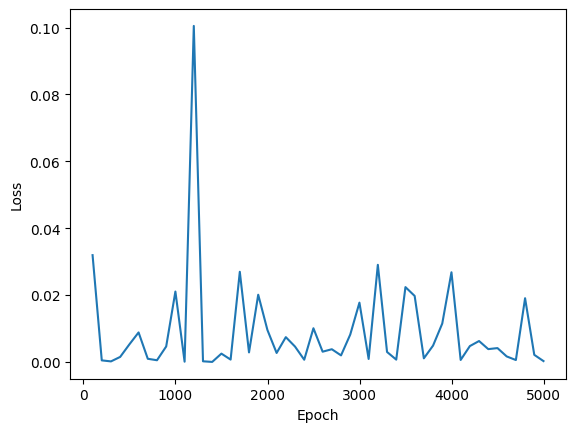

In [155]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history['Epoch'],history['loss'])

In [156]:
parameters

[array([0.94256646, 0.19442712]), np.float64(-0.08056146382175361)]

In [157]:
predict(x_test,parameters[0],parameters[1])

array([[ 71.91686797],
       [ 95.17003031],
       [174.61833497],
       [ 21.12420238]])

In [158]:
y_test

array([[ 48.],
       [ 60.],
       [102.],
       [ 32.]])